In [1]:
!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading the dataset
netflix = pd.read_csv("Copy of NETFLIX MOVIES and TV SHOWS CLUSTERING.CSV")
netflix1=netflix
netflix.head(6)

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   
5      s6  TV Show     46        Serdar Akar   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
5  Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...         Turkey   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   
5       July 1, 2017          2016  TV-MA   1 Season   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   
5    International TV Shows, TV Dramas, TV Mysteries   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...  
5  A genetics professor experiments with a treatm...

<BarContainer object of 2 artists>

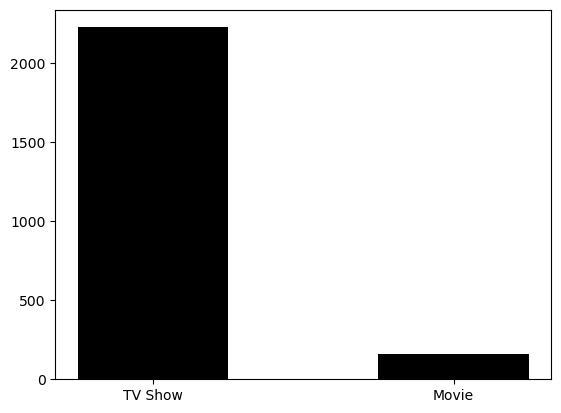

In [4]:
#checking which type has the missing diectors
no_dir=netflix[netflix['director'].isna()]
null_name=no_dir.type.value_counts().index
null_value=no_dir.type.value_counts().values
plt.bar(null_name,null_value,color='black',width=0.5)

Text(0.5, 1.0, 'TOP 10 DIRECTORS')

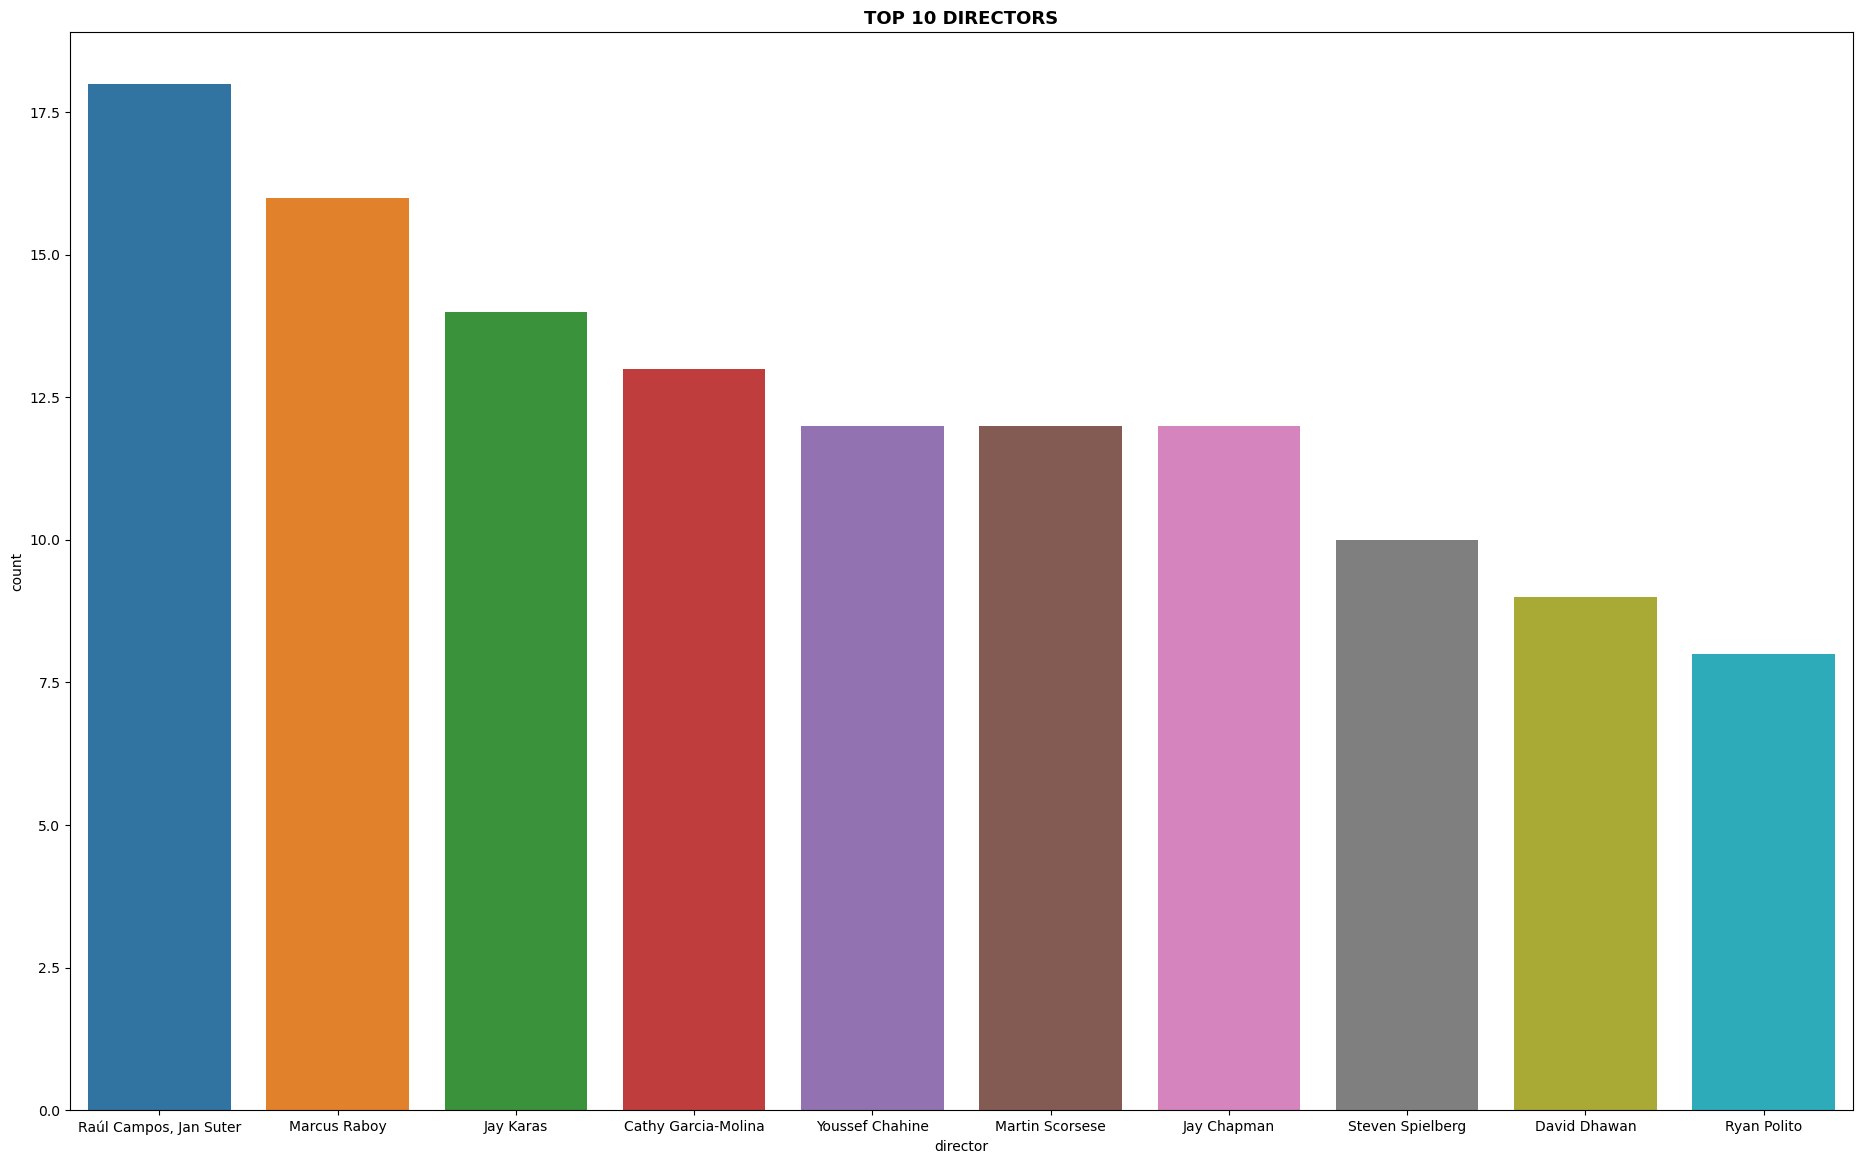

In [5]:
#finding the top 10 popular directors
plt.figure(figsize=(23,14))
graph=sns.countplot(x='director',data=netflix,order=netflix.director.value_counts().head(10).index)
graph.set_title('TOP 10 DIRECTORS',fontsize=13,fontweight='bold')

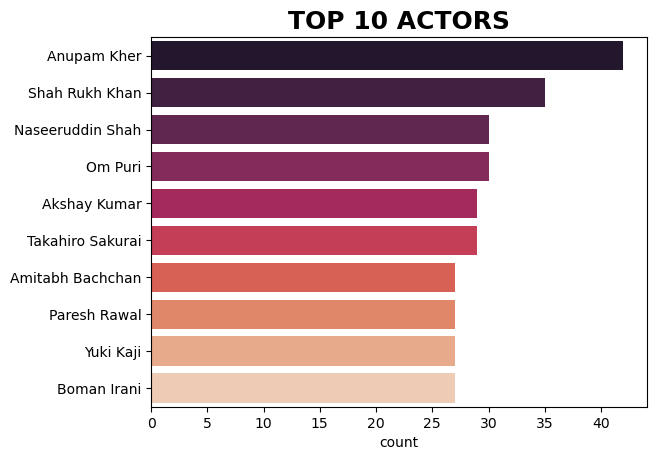

In [6]:
#top 10 most common actors
actor=netflix[netflix.cast !=' '].set_index('title').cast.str.split(', ',expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y= actor, order=actor.value_counts().index[:10],palette='rocket')
plt.title('TOP 10 ACTORS',fontsize=18,fontweight='bold')
plt.show()

In [7]:
#checking missing values in the dataset
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [8]:
netflix.head(9)

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   
5      s6  TV Show     46        Serdar Akar   
6      s7    Movie    122    Yasir Al Yasiri   
7      s8    Movie    187     Kevin Reynolds   
8      s9    Movie    706      Shravan Kumar   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
5  Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...         Turkey   
6  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...          Egypt   
7  Samuel L. Jackson, John Heard, Kelly Rowan, Cl...  United States   
8  Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...          India   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   
5       July 1, 2017          2016  TV-MA   1 Season   
6       June 1, 2020          2019  TV-MA     95 min   
7   November 1, 2019          1997      R    119 min   
8      April 1, 2019          2019  TV-14    118 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   
5    International TV Shows, TV Dramas, TV Mysteries   
6                Horror Movies, International Movies   
7                                             Dramas   
8                Horror Movies, International Movies   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...  
5  A genetics professor experiments with a treatm...  
6  After an awful accident, a couple admitted to ...  
7  After one of his high school students attacks ...  
8  When a doctor goes missing, his psychiatrist w...

In [9]:
netflix.director

0                     NaN
1       Jorge Michel Grau
2            Gilbert Chan
3             Shane Acker
4          Robert Luketic
              ...        
7782          Josef Fares
7783          Mozez Singh
7784                  NaN
7785                  NaN
7786             Sam Dunn
Name: director, Length: 7787, dtype: object

In [10]:
#getting the names of the countries
country_name=netflix.country.value_counts().index

In [11]:
#getting the number of movies and tv shows produced in a particular country
country_value=netflix.country.value_counts().values

Text(0.5, 1.0, 'Country distribution')

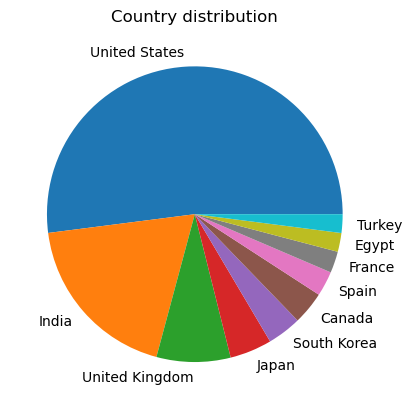

In [12]:
#finding the top 10 countries in dataset
plt.pie(country_value[:10],labels=country_name[:10])
plt.title('Country distribution')

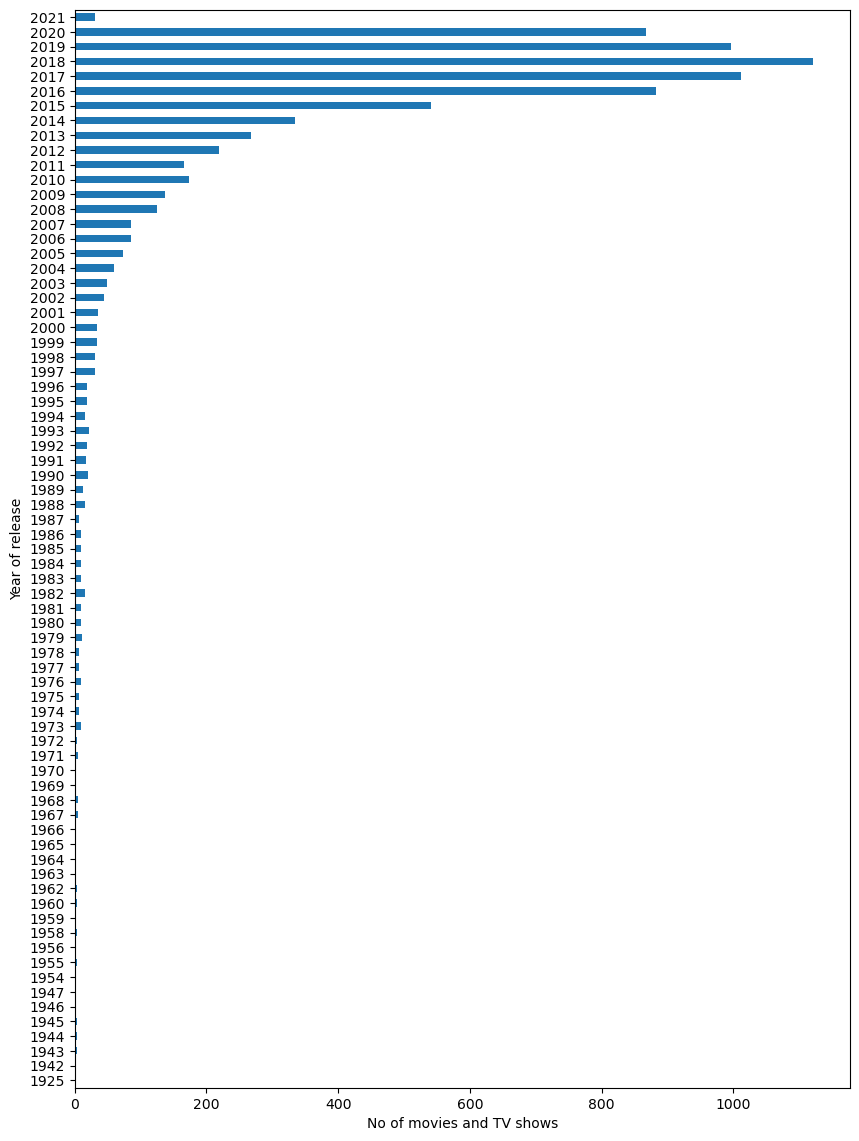

In [13]:
#finding the release date of the movies
netflix.release_year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(10,14))
plt.xlabel('No of movies and TV shows')
plt.ylabel('Year of release')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

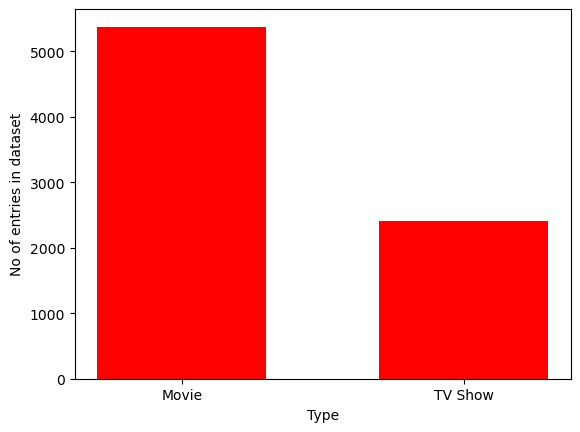

In [14]:
#comparing the amount of Tv shows and movies
type_name=netflix.type.value_counts().index
type_value=netflix.type.value_counts().values
plt.bar(type_name, type_value, color='red', width=0.6)
plt.xlabel('Type')
plt.ylabel('No of entries in dataset')
plt.show

In [15]:
#check the unique values of rating
netflix.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [16]:
#labeling the ratings to age wise for better understanding
ratings={
     'TV-MA':'Adults',
     'R':'Adults',
     'PG-13':'Teens',
     'TV-14':'Teens',
     'TV-PG':'Older Kids',
     'NR': 'Adults',
     'TV-G':'Kids',
     'TV-Y':'Kids',
     'TV-Y7':'Older Kids',
     'PG':'Older Kids',
     'G':'Kids',
     'NC-17':'Adults',
     'TV-Y7-FV':'Older Kids',
     'UR':'Adults'}
netflix['target_age']=netflix['rating'].replace(ratings)

In [17]:
#creating a new column in the dataset as target_age
netflix['type']=pd.Categorical(netflix['type'])
netflix['target_age']=pd.Categorical(netflix['target_age'],categories=['Kids','Older Kids','Teens','Adults'])

In [18]:
#
netflix['count'] = 1
data = netflix.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']
heatmap = netflix.loc[netflix['country'].isin(data)]
heatmap = pd.crosstab(heatmap['country'],heatmap['target_age'],normalize = "index").T
heatmap

country       Canada     Egypt    France     India     Japan  Mexico  \
target_age                                                             
Kids        0.180791  0.000000  0.095652  0.016251  0.008889    0.02   
Older Kids  0.225989  0.039604  0.060870  0.160347  0.271111    0.07   
Teens       0.146893  0.683168  0.165217  0.567714  0.355556    0.14   
Adults      0.446328  0.277228  0.678261  0.255688  0.364444    0.77   

country     South Korea     Spain  United Kingdom  United States  
target_age                                                        
Kids           0.027322  0.022388        0.093199       0.073276  
Older Kids     0.120219  0.044776        0.204030       0.187696  
Teens          0.382514  0.097015        0.188917       0.237069  
Adults         0.469945  0.835821        0.513854       0.501959

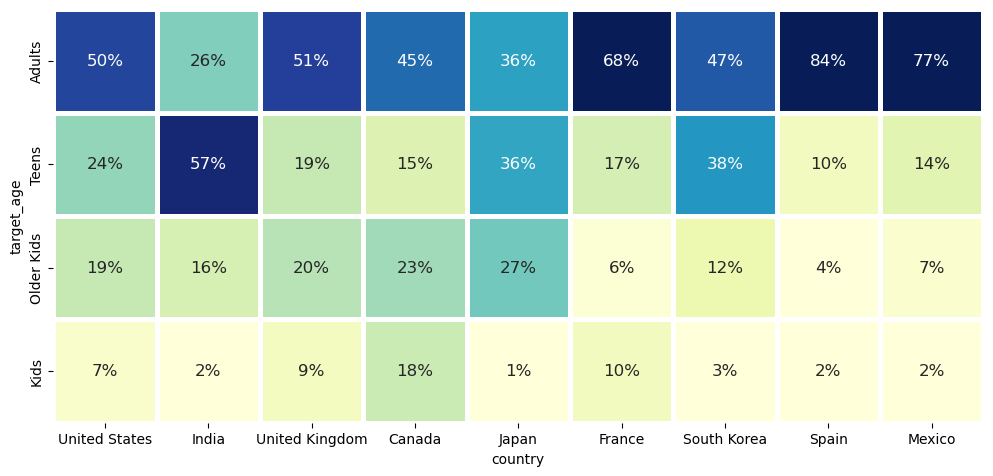

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()
     

Text(0.5, 1.0, 'Number of shows on Netflix for different age groups')

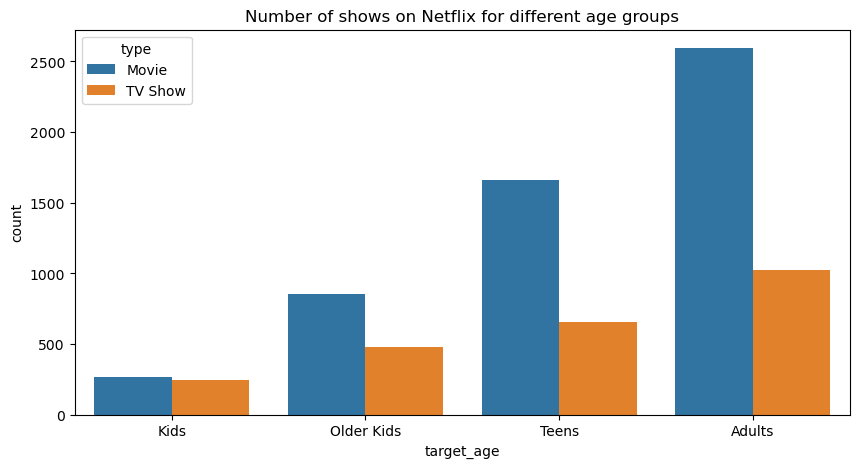

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x='target_age',hue='type',data=netflix)
plt.title('Number of shows on Netflix for different age groups')

In [21]:
#for bettter visualization of rating distribution
import plotly.express as px
graph=px.pie(netflix,names='rating',height=500,width=900,hole=0.7,title='Rating Distribution')
graph.show()

In [22]:
#checking unique values of TV shows and movies
netflix.duration.unique()

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min',
       '90 min', '102 min', '104 min', '105 min', '56 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '109 min', '44 min',
       '75 min', '101 min', '3 Seasons', '37 min', '113 min', '114 min',
       '130 min', '94 min', '140 min', '135 min', '82 min', '70 min',
       '121 min', '92 min', '164 min', '53 min', '83 min', '116 min',
       '86 min', '120 min', '96 min', '126 min', '129 min', '77 min',
       '137 min', '148 min', '28 min', '122 min', '176 min', '85 min',
       '22 min', '68 min', '111 min', '29 min', '142 min', '168 min',
       '21 min', '59 min', '20 min', '98 min', '108 min', '76 min',
       '26 min', '156 min', '30 min', '57 min', '150 min', '133 min',
       '1

In [23]:
#seperating TV Shows and movies to find duration
TV_shows=netflix[netflix['type']=='TV Show']
movies=netflix[netflix['type']=='Movie']

In [24]:
#removing min and converting duration to integer
movies['duration']=movies['duration'].str.replace(' min','')

C:\Users\HP\AppData\Local\Temp\ipykernel_22620\1280880456.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
movies['duration']=movies['duration'].astype(str).astype(int)
movies['duration']

C:\Users\HP\AppData\Local\Temp\ipykernel_22620\4242791568.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5377, dtype: int32

<AxesSubplot:xlabel='duration', ylabel='Density'>

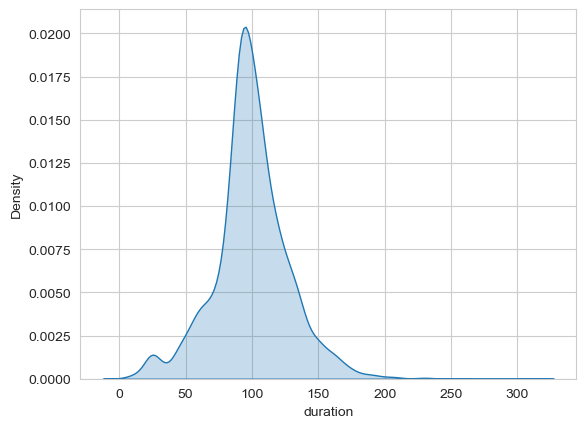

In [26]:
sns.set_style('whitegrid')
sns.kdeplot(data=movies['duration'],shade=True)

In [27]:
TV_shows['duration']=TV_shows['duration'].str.replace(' Seasons','')
TV_shows['duration']=TV_shows['duration'].str.replace(' Season','')

C:\Users\HP\AppData\Local\Temp\ipykernel_22620\1974004868.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP\AppData\Local\Temp\ipykernel_22620\1974004868.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
TV_shows['duration']=TV_shows['duration'].astype(str).astype(int)

C:\Users\HP\AppData\Local\Temp\ipykernel_22620\2641367243.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:xlabel='duration', ylabel='Density'>

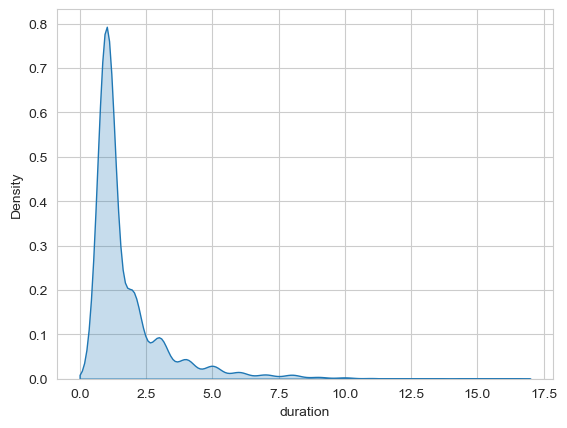

In [29]:
sns.set_style('whitegrid')
sns.kdeplot(data=TV_shows['duration'], shade=True)

In [30]:
netflix.listed_in.unique()

array(['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy',
       'Dramas, International Movies',
       'Horror Movies, International Movies',
       'Action & Adventure, Independent Movies, Sci-Fi & Fantasy',
       'Dramas', 'International TV Shows, TV Dramas, TV Mysteries',
       'Horror Movies, International Movies, Thrillers',
       'Dramas, Thrillers',
       'Crime TV Shows, International TV Shows, TV Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Documentaries, International Movies, Sports Movies',
       'Independent Movies, Sci-Fi & Fantasy, Thrillers',
       'Dramas, International Movies, Thrillers',
       'International TV Shows, TV Dramas',
       'Comedies, Dramas, Independent Movies', 'Sports Movies',
       'Dramas, Independent Movies, International Movies',
       'Action & Adventure, Dramas, International Movies',
       'Anime Series, International TV Shows', 'Documentaries',
       'Reality TV', 'Documentaries, International

In [31]:
categories =[]
for category in netflix.listed_in.values:
    len_category = len(category.split(','))
    categories.append(len_category)


In [32]:
netflix['categories'] = categories

In [33]:
genres = netflix.set_index('title').listed_in.str.split(',', expand=True).stack().reset_index(level=1,drop=True)
genres

title
3%                                         International TV Shows
3%                                                      TV Dramas
3%                                            TV Sci-Fi & Fantasy
7:19                                                       Dramas
7:19                                         International Movies
                                                    ...          
Zulu Man in Japan                                Music & Musicals
Zumbo's Just Desserts                      International TV Shows
Zumbo's Just Desserts                                  Reality TV
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS             Documentaries
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS          Music & Musicals
Length: 17071, dtype: object

Text(0.5, 1.0, 'genres')

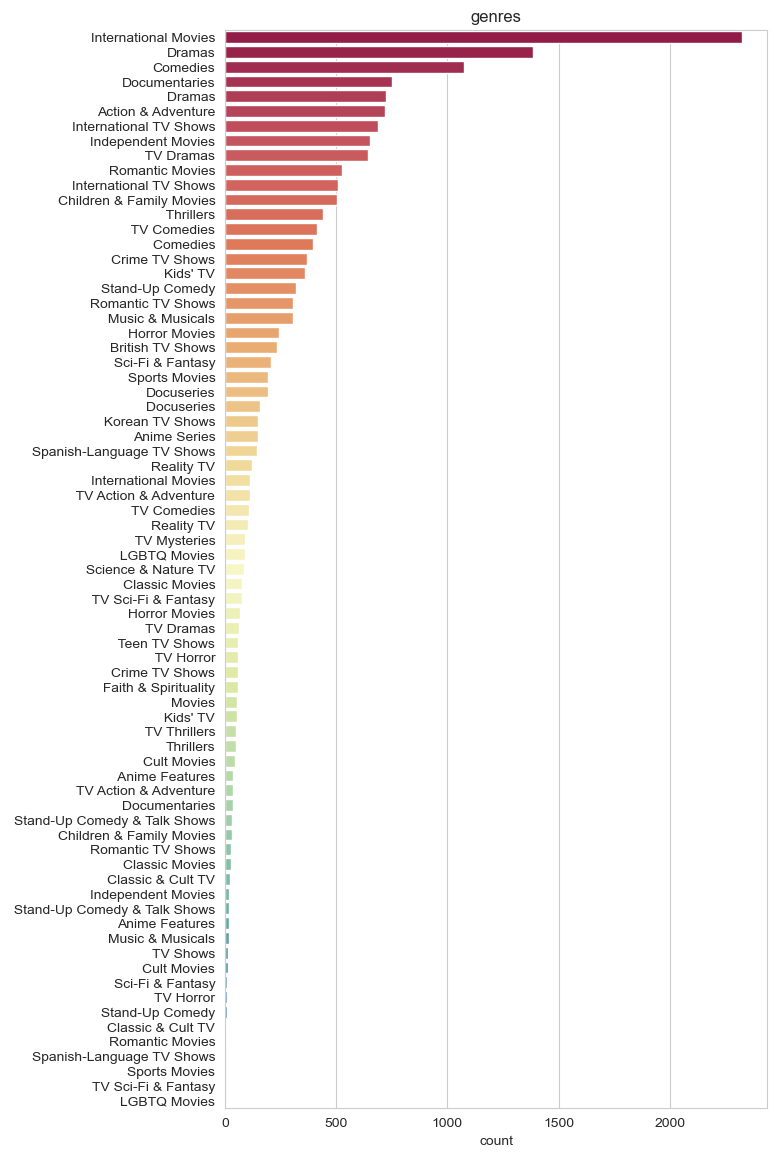

In [34]:
plt.figure(figsize=(7,14))
graphy=sns.countplot(y = genres, order=genres.value_counts().index, palette = 'Spectral')
plt.title('genres')

In [35]:
netflix['month']=pd.DatetimeIndex(netflix['date_added']).month
netflix['year']=pd.DatetimeIndex(netflix['date_added']).year

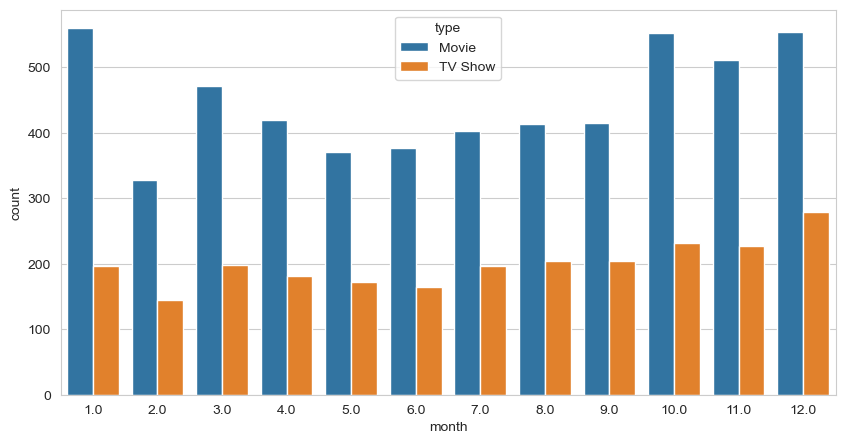

In [36]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='month',hue='type', data=netflix)
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, '')

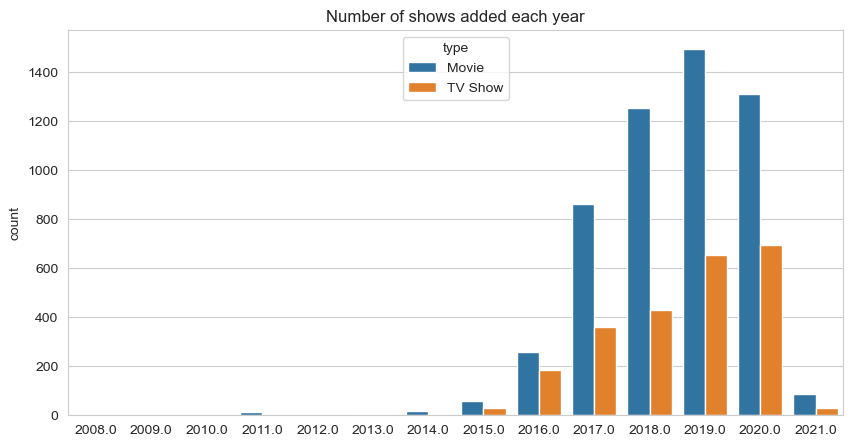

In [37]:
plt.figure(figsize = (10,5)) 
sns.countplot(netflix['year'],hue=netflix['type'])
plt.title('Number of shows added each year')
plt.xlabel('')

In [38]:
#fill the director column with null values
netflix['director'].fillna('',inplace=True)
netflix=netflix.dropna(subset=['date_added','rating'])
netflix['cast'].fillna('',inplace=True)
netflix['country'].fillna('',inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_22620\3106626904.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP\AppData\Local\Temp\ipykernel_22620\3106626904.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
import nltk

In [40]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [41]:
#defining a function to find the root words.
def stem(x):
  y=[]
  for i in str(x).split():
   y.append(ps.stem(i))
  return " ".join(y)

In [42]:
#removing spaces between first and last names, also removing the commas to make 
netflix['director']=netflix['director'].str.replace(" ","")
netflix['country']=netflix['country'].str.replace(" ","")
netflix['type']=netflix['type'].str.replace(" ","")
netflix['cast']=netflix['cast'].str.replace(" ","")


C:\Users\HP\AppData\Local\Temp\ipykernel_22620\2975613034.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP\AppData\Local\Temp\ipykernel_22620\2975613034.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP\AppData\Local\Temp\ipykernel_22620\2975613034.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [43]:
netflix['cast']=netflix['cast'].str.replace(","," ")

C:\Users\HP\AppData\Local\Temp\ipykernel_22620\100197373.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
#creating a function which gives the length of the description attribute's values
def length(text):    
    return len(text)

In [45]:
netflix['length_of_description_Before'] = netflix['description'].apply(length)
netflix.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_22620\860128474.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



show_id    type  title         director  \
0      s1  TVShow     3%                    
1      s2   Movie   7:19  JorgeMichelGrau   
2      s3   Movie  23:59      GilbertChan   
3      s4   Movie      9       ShaneAcker   
4      s5   Movie     21    RobertLuketic   

                                                cast       country  \
0  JoãoMiguel BiancaComparato MichelGomes Rodolfo...        Brazil   
1  DemiánBichir HéctorBonilla OscarSerrano Azalia...        Mexico   
2  TeddChan StellaChung HenleyHii LawrenceKoh Tom...     Singapore   
3  ElijahWood JohnC.Reilly JenniferConnelly Chris...  UnitedStates   
4  JimSturgess KevinSpacey KateBosworth AaronYoo ...  UnitedStates   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description target_age  count  \
0  In a future where the elite inhabit an island ...     Adults      1   
1  After a devastating earthquake hits Mexico Cit...     Adults      1   
2  When an army recruit is found dead, his fellow...     Adults      1   
3  In a postapocalyptic world, rag-doll robots hi...      Teens      1   
4  A brilliant group of students become card-coun...      Teens      1   

   categories  month    year  length_of_description_Before  
0           3    8.0  2020.0                           136  
1           2   12.0  2016.0                           148  
2           2   12.0  2018.0                           149  
3           3   11.0  2017.0                           145  
4           1    1.0  2020.0                           143

In [46]:
# using nltk library to download stopwords
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
sw=stopwords.words('english')
#Defining stopwords 
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word for word in text.split() if word not in sw]
    # joining the list of words with space separator
    return " ".join(text)
# applying above function on text feature

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
import string
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [48]:
netflix['description']=netflix['description'].apply(remove_punctuation)

C:\Users\HP\AppData\Local\Temp\ipykernel_22620\2016379040.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
netflix['description']=netflix['description'].apply(stem)

C:\Users\HP\AppData\Local\Temp\ipykernel_22620\2204380250.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
# applying above function on text feature
netflix['description']=netflix['description'].apply(stopwords)

C:\Users\HP\AppData\Local\Temp\ipykernel_22620\3429257989.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
# creating a new column which gives the length of the description attribute's values 
netflix['length_of_description_after'] = netflix['description'].apply(length)
netflix.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_22620\1173918806.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



show_id    type  title         director  \
0      s1  TVShow     3%                    
1      s2   Movie   7:19  JorgeMichelGrau   
2      s3   Movie  23:59      GilbertChan   
3      s4   Movie      9       ShaneAcker   
4      s5   Movie     21    RobertLuketic   

                                                cast       country  \
0  JoãoMiguel BiancaComparato MichelGomes Rodolfo...        Brazil   
1  DemiánBichir HéctorBonilla OscarSerrano Azalia...        Mexico   
2  TeddChan StellaChung HenleyHii LawrenceKoh Tom...     Singapore   
3  ElijahWood JohnC.Reilly JenniferConnelly Chris...  UnitedStates   
4  JimSturgess KevinSpacey KateBosworth AaronYoo ...  UnitedStates   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description target_age  count  \
0  futur elit inhabit island paradis far crowd sl...     Adults      1   
1  devast earthquak hit mexico citi trap survivor...     Adults      1   
2  armi recruit found dead hi fellow soldier forc...     Adults      1   
3  postapocalypt world ragdol robot hide fear dan...      Teens      1   
4  brilliant group student becom cardcount expert...      Teens      1   

   categories  month    year  length_of_description_Before  \
0           3    8.0  2020.0                           136   
1           2   12.0  2016.0                           148   
2           2   12.0  2018.0                           149   
3           3   11.0  2017.0                           145   
4           1    1.0  2020.0                           143   

   length_of_description_after  
0                           82  
1                           88  
2                          100  
3                           89  
4                           98

In [52]:
# Removing punctuation for listed_in
netflix['listed_in'] = netflix['listed_in'].apply(remove_punctuation)

C:\Users\HP\AppData\Local\Temp\ipykernel_22620\3388316213.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
#Removing stopwords for listed_in
netflix['listed_in'] = netflix['listed_in'].apply(stopwords)
netflix.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_22620\1380026561.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



show_id    type  title         director  \
0      s1  TVShow     3%                    
1      s2   Movie   7:19  JorgeMichelGrau   
2      s3   Movie  23:59      GilbertChan   
3      s4   Movie      9       ShaneAcker   
4      s5   Movie     21    RobertLuketic   

                                                cast       country  \
0  JoãoMiguel BiancaComparato MichelGomes Rodolfo...        Brazil   
1  DemiánBichir HéctorBonilla OscarSerrano Azalia...        Mexico   
2  TeddChan StellaChung HenleyHii LawrenceKoh Tom...     Singapore   
3  ElijahWood JohnC.Reilly JenniferConnelly Chris...  UnitedStates   
4  JimSturgess KevinSpacey KateBosworth AaronYoo ...  UnitedStates   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows TV Dramas TV SciFi Fantasy   
1                        Dramas International Movies   
2                 Horror Movies International Movies   
3  Action Adventure Independent Movies SciFi Fantasy   
4                                             Dramas   

                                         description target_age  count  \
0  futur elit inhabit island paradis far crowd sl...     Adults      1   
1  devast earthquak hit mexico citi trap survivor...     Adults      1   
2  armi recruit found dead hi fellow soldier forc...     Adults      1   
3  postapocalypt world ragdol robot hide fear dan...      Teens      1   
4  brilliant group student becom cardcount expert...      Teens      1   

   categories  month    year  length_of_description_Before  \
0           3    8.0  2020.0                           136   
1           2   12.0  2016.0                           148   
2           2   12.0  2018.0                           149   
3           3   11.0  2017.0                           145   
4           1    1.0  2020.0                           143   

   length_of_description_after  
0                           82  
1                           88  
2                          100  
3                           89  
4                           98

In [54]:
# stemming for listed_in
netflix['listed_in'] = netflix['listed_in'].apply(stem)
netflix.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_22620\3062775022.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



show_id    type  title         director  \
0      s1  TVShow     3%                    
1      s2   Movie   7:19  JorgeMichelGrau   
2      s3   Movie  23:59      GilbertChan   
3      s4   Movie      9       ShaneAcker   
4      s5   Movie     21    RobertLuketic   

                                                cast       country  \
0  JoãoMiguel BiancaComparato MichelGomes Rodolfo...        Brazil   
1  DemiánBichir HéctorBonilla OscarSerrano Azalia...        Mexico   
2  TeddChan StellaChung HenleyHii LawrenceKoh Tom...     Singapore   
3  ElijahWood JohnC.Reilly JenniferConnelly Chris...  UnitedStates   
4  JimSturgess KevinSpacey KateBosworth AaronYoo ...  UnitedStates   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                     listed_in  \
0     intern tv show tv drama tv scifi fantasi   
1                            drama intern movi   
2                      horror movi intern movi   
3  action adventur independ movi scifi fantasi   
4                                        drama   

                                         description target_age  count  \
0  futur elit inhabit island paradis far crowd sl...     Adults      1   
1  devast earthquak hit mexico citi trap survivor...     Adults      1   
2  armi recruit found dead hi fellow soldier forc...     Adults      1   
3  postapocalypt world ragdol robot hide fear dan...      Teens      1   
4  brilliant group student becom cardcount expert...      Teens      1   

   categories  month    year  length_of_description_Before  \
0           3    8.0  2020.0                           136   
1           2   12.0  2016.0                           148   
2           2   12.0  2018.0                           149   
3           3   11.0  2017.0                           145   
4           1    1.0  2020.0                           143   

   length_of_description_after  
0                           82  
1                           88  
2                          100  
3                           89  
4                           98

In [55]:
# Now after removing stopwords, punctuations and doing stemming to listed_in attribute, lets recheck the length of the values.
netflix['length_of_listed_in_after'] = netflix['listed_in'].apply(length)
netflix.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_22620\1676512835.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



show_id    type  title         director  \
0      s1  TVShow     3%                    
1      s2   Movie   7:19  JorgeMichelGrau   
2      s3   Movie  23:59      GilbertChan   
3      s4   Movie      9       ShaneAcker   
4      s5   Movie     21    RobertLuketic   

                                                cast       country  \
0  JoãoMiguel BiancaComparato MichelGomes Rodolfo...        Brazil   
1  DemiánBichir HéctorBonilla OscarSerrano Azalia...        Mexico   
2  TeddChan StellaChung HenleyHii LawrenceKoh Tom...     Singapore   
3  ElijahWood JohnC.Reilly JenniferConnelly Chris...  UnitedStates   
4  JimSturgess KevinSpacey KateBosworth AaronYoo ...  UnitedStates   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                     listed_in  \
0     intern tv show tv drama tv scifi fantasi   
1                            drama intern movi   
2                      horror movi intern movi   
3  action adventur independ movi scifi fantasi   
4                                        drama   

                                         description target_age  count  \
0  futur elit inhabit island paradis far crowd sl...     Adults      1   
1  devast earthquak hit mexico citi trap survivor...     Adults      1   
2  armi recruit found dead hi fellow soldier forc...     Adults      1   
3  postapocalypt world ragdol robot hide fear dan...      Teens      1   
4  brilliant group student becom cardcount expert...      Teens      1   

   categories  month    year  length_of_description_Before  \
0           3    8.0  2020.0                           136   
1           2   12.0  2016.0                           148   
2           2   12.0  2018.0                           149   
3           3   11.0  2017.0                           145   
4           1    1.0  2020.0                           143   

   length_of_description_after  length_of_listed_in_after  
0                           82                         40  
1                           88                         17  
2                          100                         23  
3                           89                         43  
4                           98                          5

In [56]:
netflix['description'].iloc[0]

'futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor'

In [57]:
# importing required modules from sklearn library
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
X_features_rec_mon=netflix[['length_of_description_after','length_of_listed_in_after']]
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]  # listing out the number of clusters
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.33658923587994255
For n_clusters = 3, silhouette score is 0.3471771675579477
For n_clusters = 4, silhouette score is 0.31904603890824335
For n_clusters = 5, silhouette score is 0.3175805000307663
For n_clusters = 6, silhouette score is 0.32476711594753555
For n_clusters = 7, silhouette score is 0.3304619120742275
For n_clusters = 8, silhouette score is 0.32457341220773295
For n_clusters = 9, silhouette score is 0.31838425825606553
For n_clusters = 10, silhouette score is 0.32633198225673005
For n_clusters = 11, silhouette score is 0.32561990548737807
For n_clusters = 12, silhouette score is 0.32562190873691266
For n_clusters = 13, silhouette score is 0.33094169485851943
For n_clusters = 14, silhouette score is 0.3261346232134757
For n_clusters = 15, silhouette score is 0.32742574907186484


In [58]:
!pip install yellowbrick

In [59]:
# to visualize the silhouette score oupput wrt clusters, we used SilhouetteVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

In [60]:
from sklearn.metrics import silhouette_score, silhouette_samples
def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      kmean_clusters = KMeans (n_clusters=n_clusters, random_state=5)
      predictions = kmean_clusters.fit_predict(X)
      centers = kmean_clusters.cluster_centers_

      score = silhouette_score(X, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(kmean_clusters)

      visualizer.fit(X) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data

For n_clusters = 2, silhouette score is 0.32742574907186484


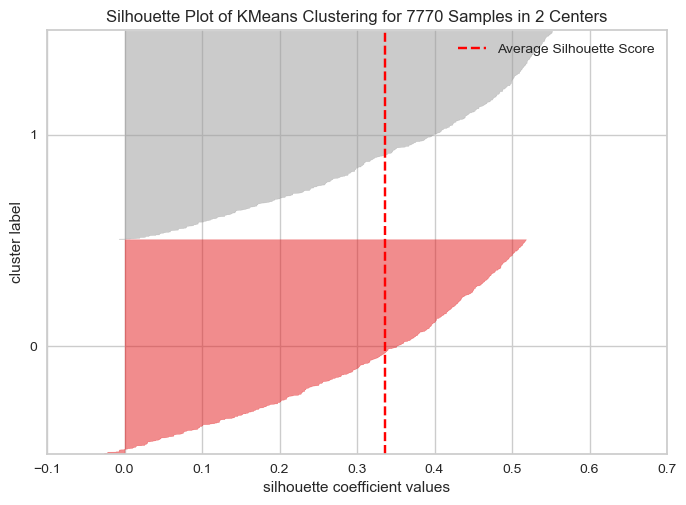

For n_clusters = 3, silhouette score is 0.32742574907186484


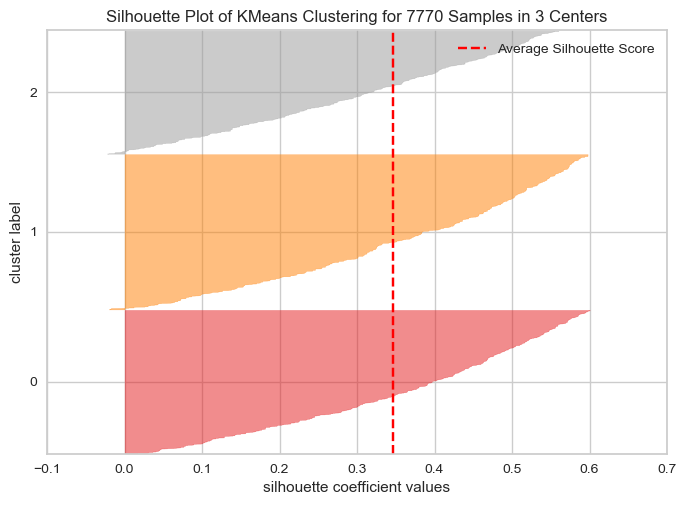

For n_clusters = 4, silhouette score is 0.32742574907186484


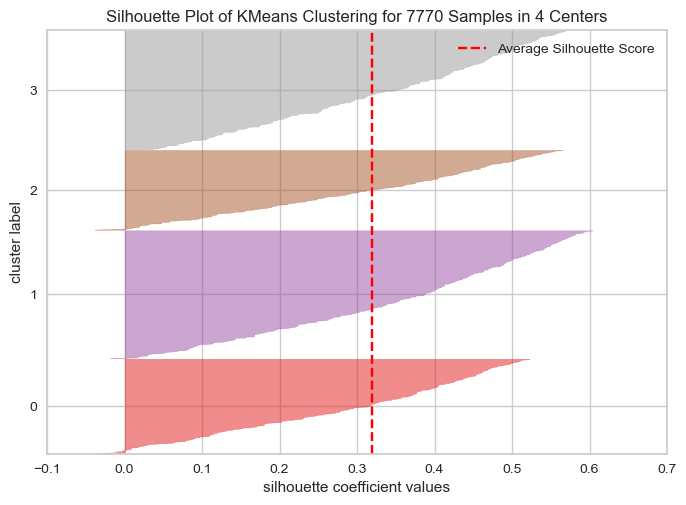

For n_clusters = 5, silhouette score is 0.32742574907186484


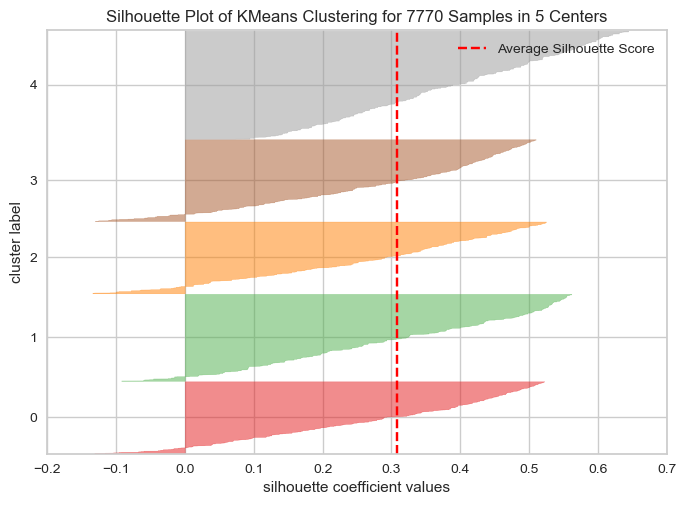

For n_clusters = 6, silhouette score is 0.32742574907186484


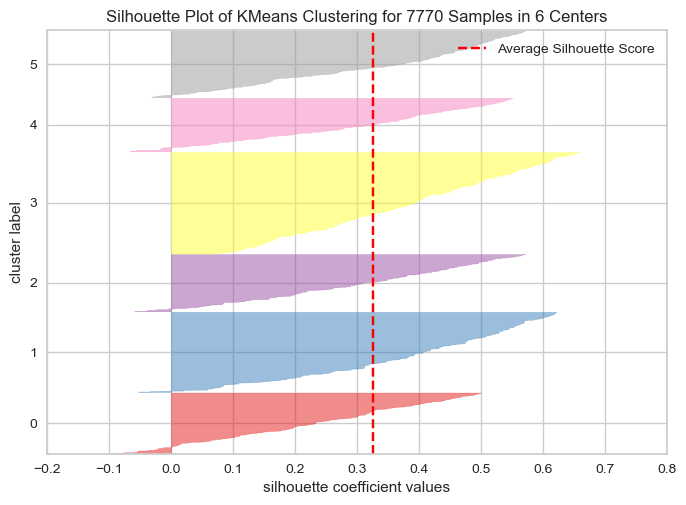

For n_clusters = 7, silhouette score is 0.32742574907186484


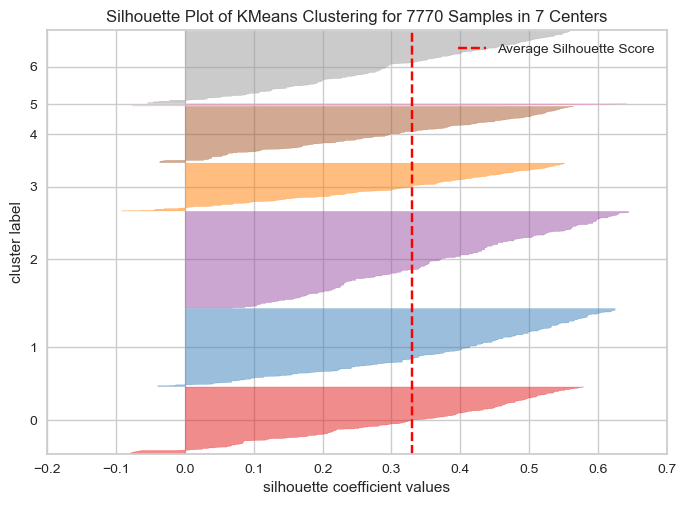

For n_clusters = 8, silhouette score is 0.32742574907186484


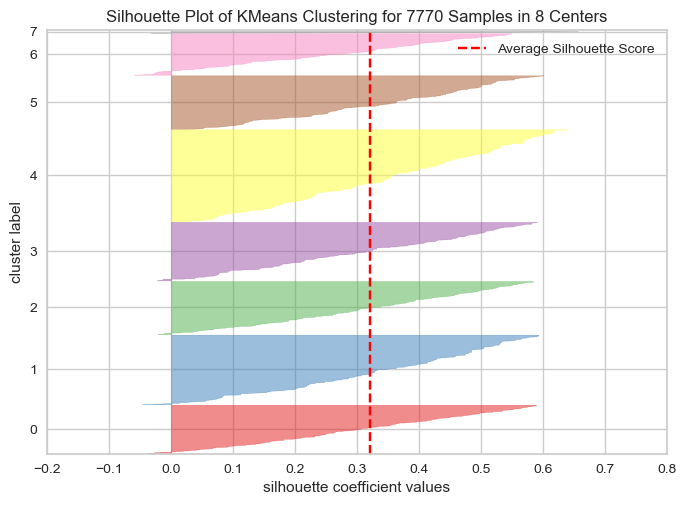

For n_clusters = 9, silhouette score is 0.32742574907186484


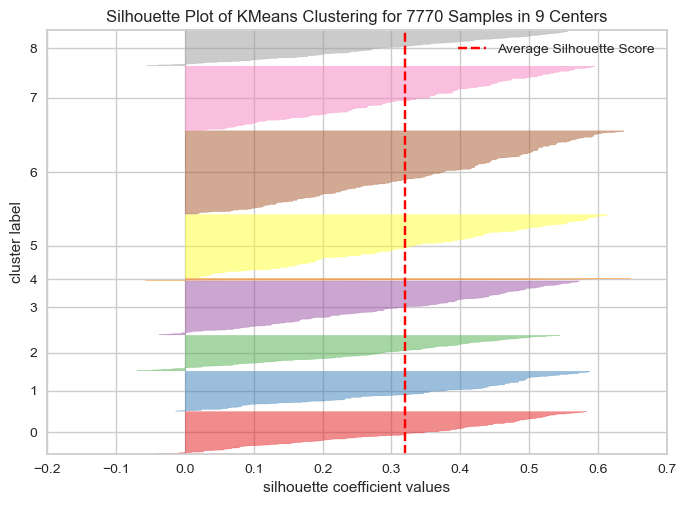

For n_clusters = 10, silhouette score is 0.32742574907186484


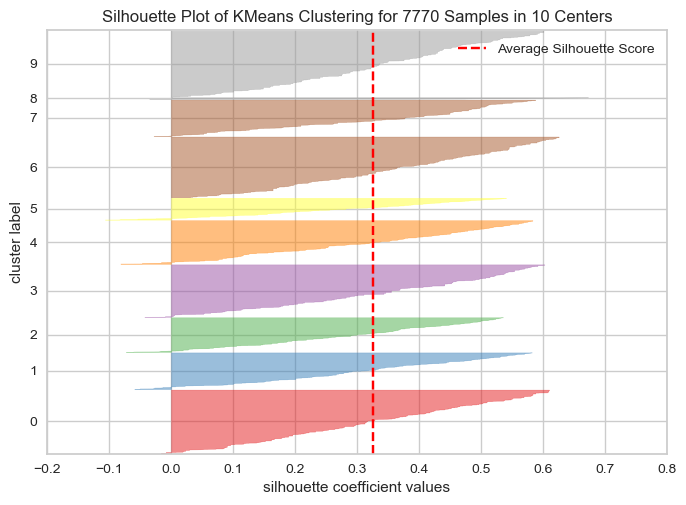

For n_clusters = 11, silhouette score is 0.32742574907186484


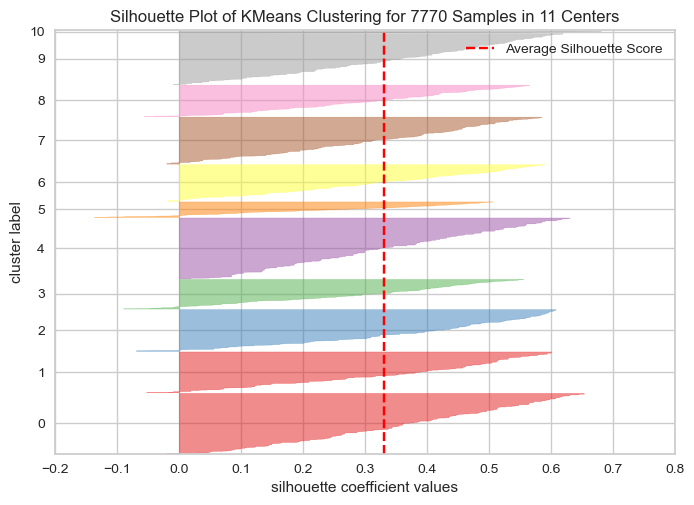

For n_clusters = 12, silhouette score is 0.32742574907186484


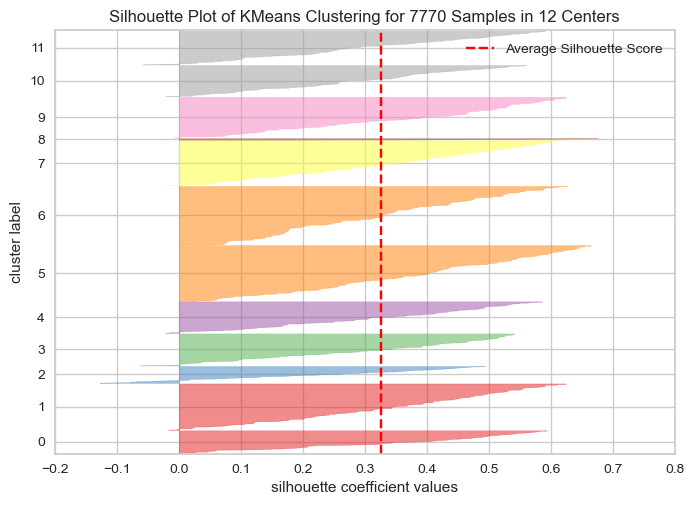

For n_clusters = 13, silhouette score is 0.32742574907186484


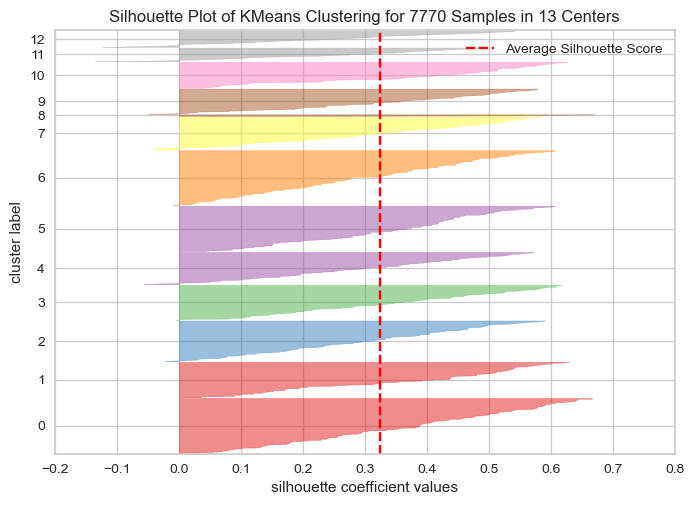

For n_clusters = 14, silhouette score is 0.32742574907186484


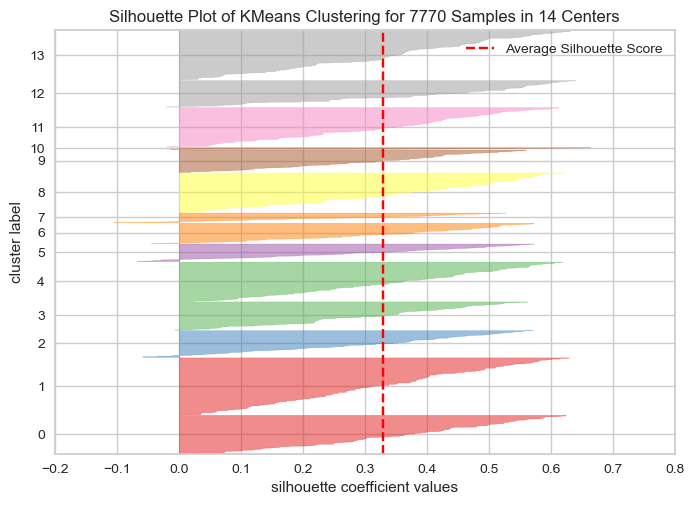

For n_clusters = 15, silhouette score is 0.32742574907186484


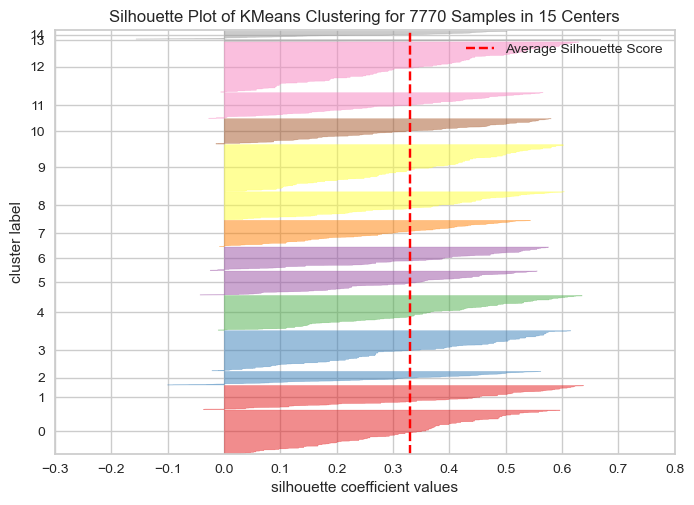

For n_clusters = 16, silhouette score is 0.32742574907186484


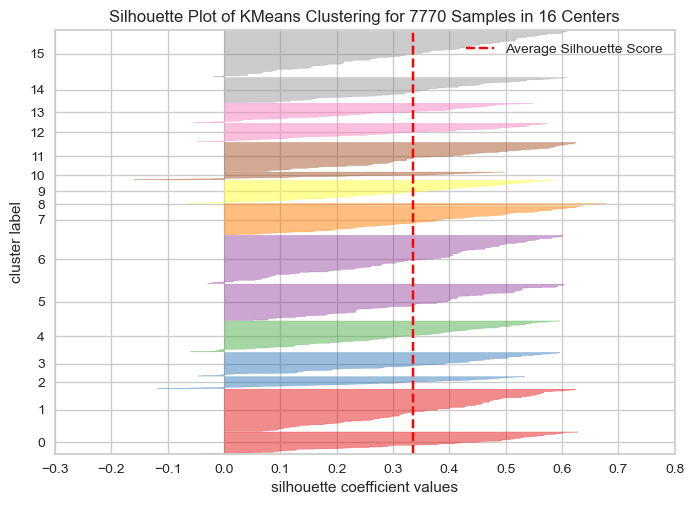

For n_clusters = 17, silhouette score is 0.32742574907186484


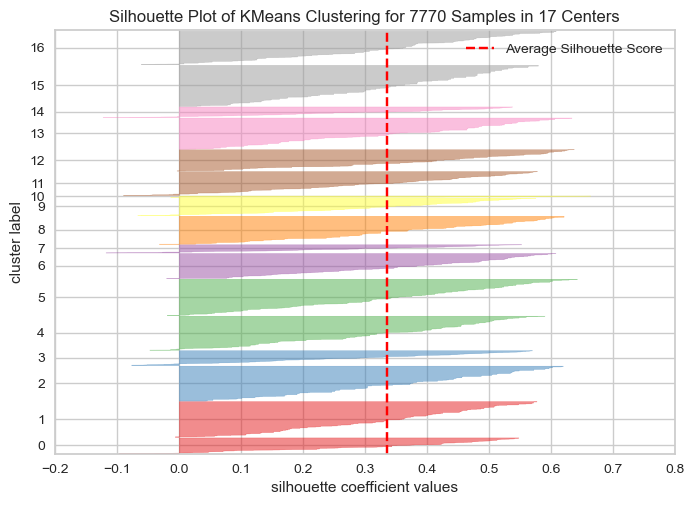

For n_clusters = 18, silhouette score is 0.32742574907186484


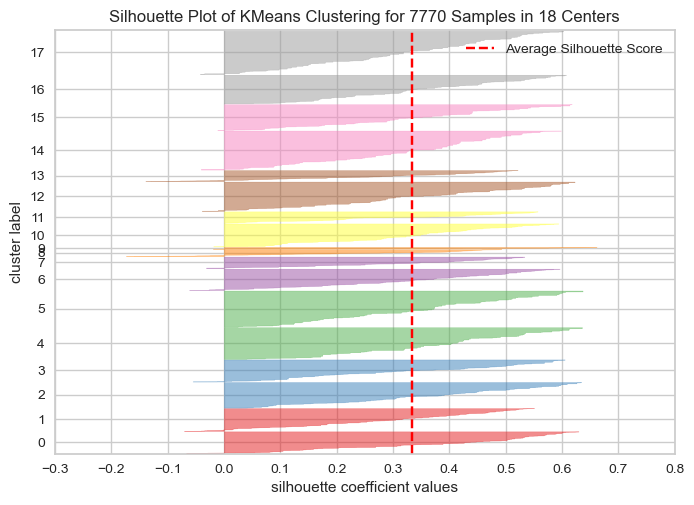

For n_clusters = 19, silhouette score is 0.32742574907186484


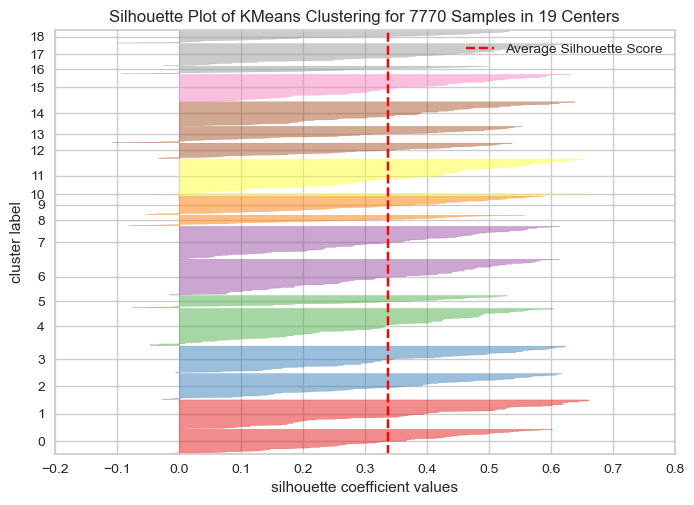

For n_clusters = 20, silhouette score is 0.32742574907186484


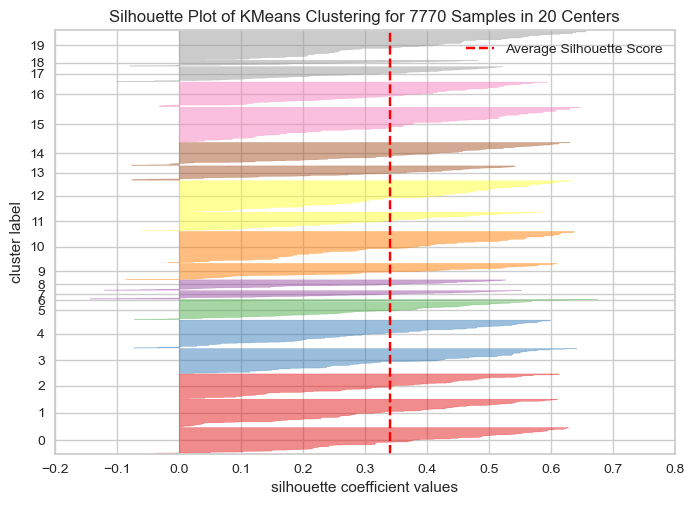

For n_clusters = 21, silhouette score is 0.32742574907186484


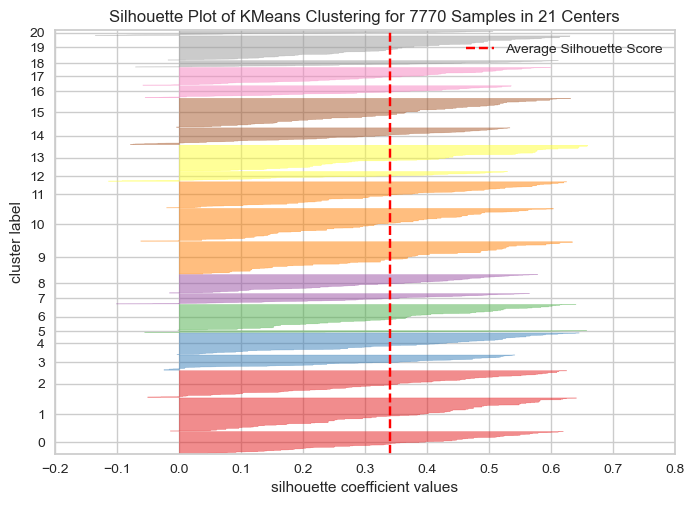

In [61]:
silhouette_score_analysis(22)

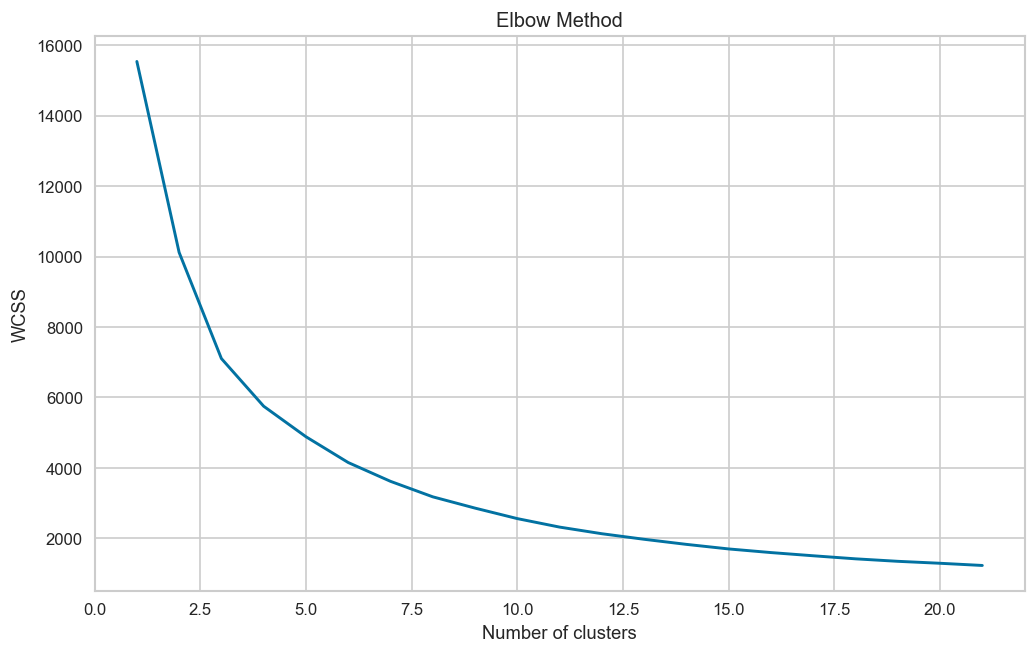

In [62]:
# Interpretation of a line plot with an elbow shape
plt.figure(figsize=(10,6), dpi=120)
wcss = [] # within clusters sum of squares
for i in range(1, 22):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [63]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

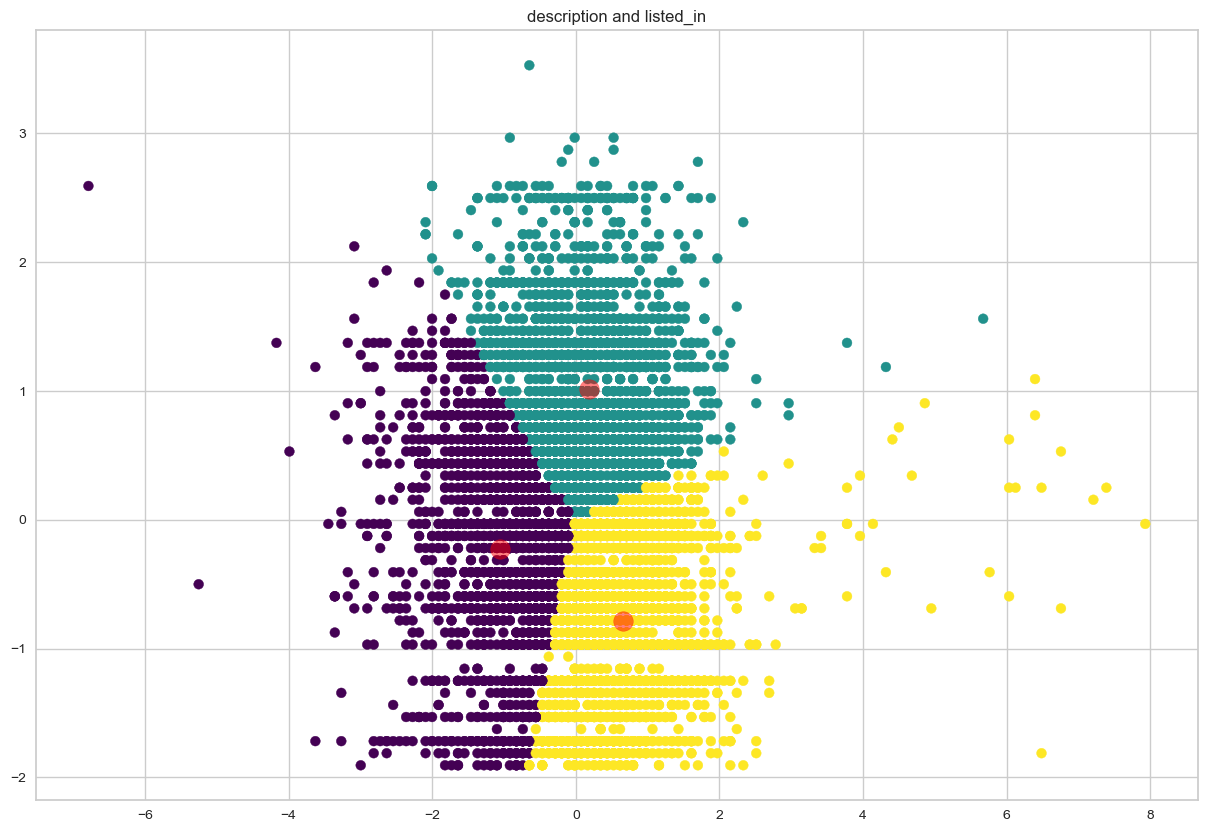

In [64]:
# plotting a scatterplot
plt.figure(figsize=(15,10))
plt.title('description and listed_in')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap= 'viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

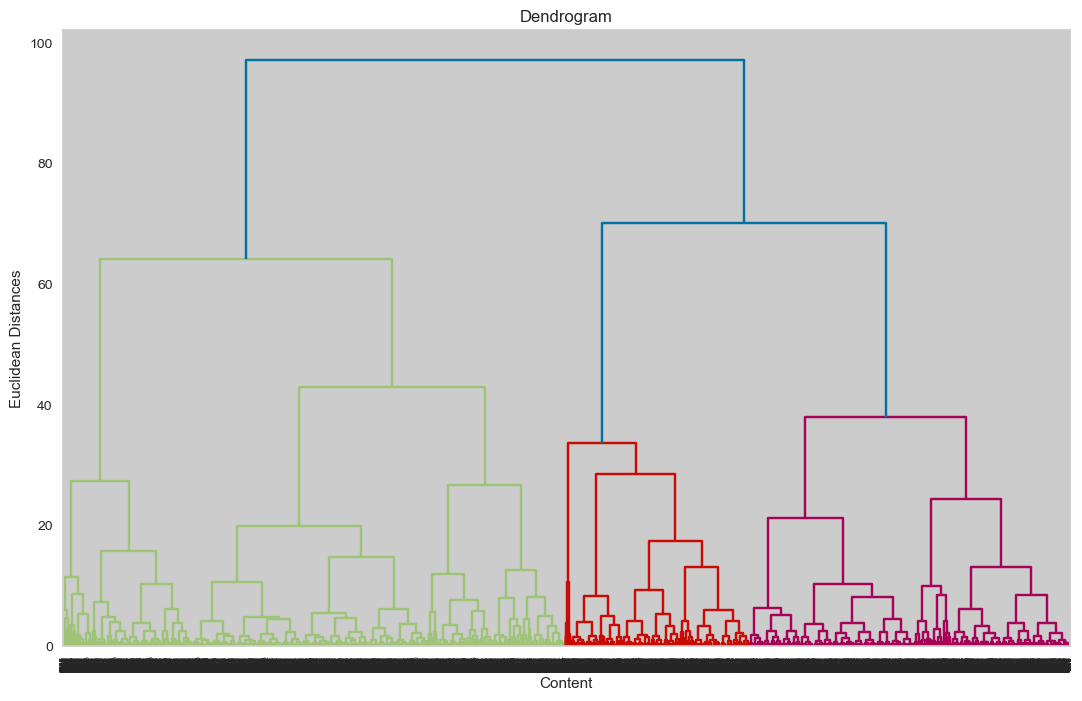

In [65]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show() 

# finding largest vertical distance we can make without crossing any other horizontal line

In [66]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

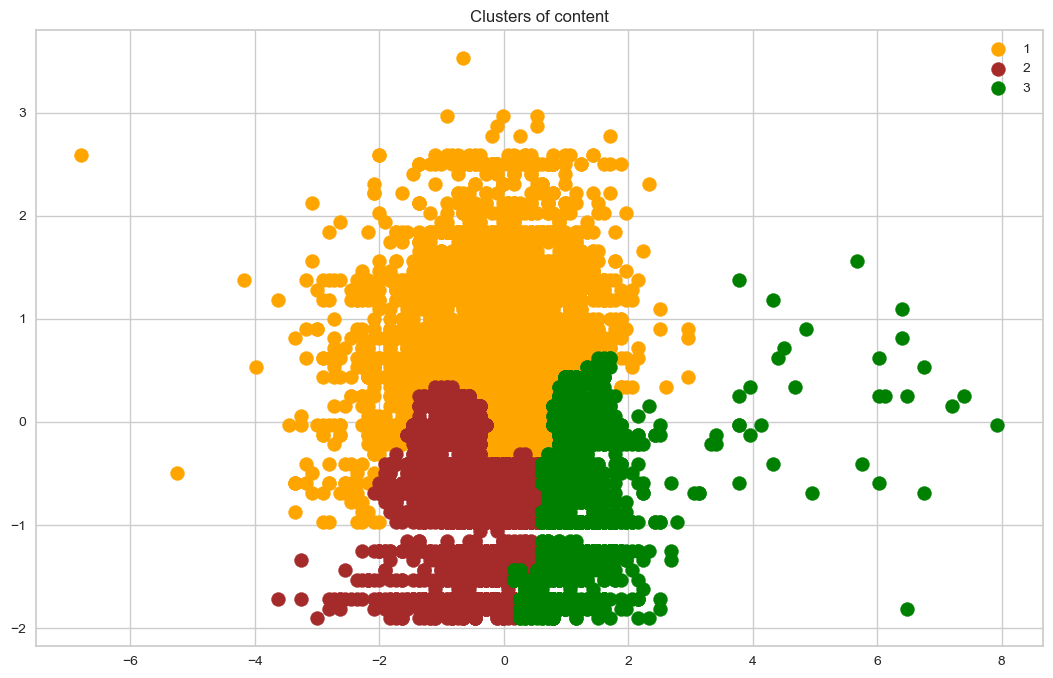

In [67]:
# Visualizing the clusters (three dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'orange', label = '1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'brown', label = '2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = '3')
plt.title('Clusters of content')

plt.legend()
plt.show()

In [68]:
# lets see the club the different attributes values in one column 
nullflix = netflix[['title']]
nullflix['cluster_data'] = (netflix['description'] + ' ' + netflix['listed_in'] + ' ' + netflix['cast'] + ' ' + netflix['country'] + ' '+netflix['director']+' ' + netflix['rating']).astype(str)
nullflix.set_index('title', inplace = True)
nullflix.head()
nullflix.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_22620\2592641419.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



cluster_data
title                                                   
3%     futur elit inhabit island paradis far crowd sl...
7:19   devast earthquak hit mexico citi trap survivor...
23:59  armi recruit found dead hi fellow soldier forc...
9      postapocalypt world ragdol robot hide fear dan...
21     brilliant group student becom cardcount expert...

In [69]:
bagging_of_words = nullflix.cluster_data
bagging_of_words

title
3%                                         futur elit inhabit island paradis far crowd sl...
7:19                                       devast earthquak hit mexico citi trap survivor...
23:59                                      armi recruit found dead hi fellow soldier forc...
9                                          postapocalypt world ragdol robot hide fear dan...
21                                         brilliant group student becom cardcount expert...
                                                                 ...                        
Zozo                                       lebanon civil war depriv zozo hi famili left g...
Zubaan                                     scrappi poor boy worm hi way tycoon dysfunct f...
Zulu Man in Japan                          thi documentari south african rapper nasti c h...
Zumbo's Just Desserts                      dessert wizard adriano zumbo look next “willi ...
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS    thi documentari delv 

In [70]:
# Converting a collection of texts to a matrix of token counts using CountVectorizer module
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
t_vectorizer = TfidfVectorizer()
count_matrix= t_vectorizer.fit_transform(bagging_of_words)
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.01225945, 0.02435819, ..., 0.01180376, 0.02033201,
        0.00894897],
       [0.01225945, 1.        , 0.00664486, ..., 0.06570109, 0.00651772,
        0.00573854],
       [0.02435819, 0.00664486, 1.        , ..., 0.00840879, 0.00247264,
        0.        ],
       ...,
       [0.01180376, 0.06570109, 0.00840879, ..., 1.        , 0.01721828,
        0.21914069],
       [0.02033201, 0.00651772, 0.00247264, ..., 0.01721828, 1.        ,
        0.04147306],
       [0.00894897, 0.00573854, 0.        , ..., 0.21914069, 0.04147306,
        1.        ]])

In [71]:
indices = pd.Series(nullflix.index)
indices[:5]

0       3%
1     7:19
2    23:59
3        9
4       21
Name: title, dtype: object

In [72]:
# function that takes in movie title as input and returns the top 10 recommended movies
def recommendations(Title, cosine_sim = cosine_sim):
    
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == Title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(nullflix.index)[i])
        
    return recommended_movies

In [81]:
# Lets try getting recommendations.
recommendation = pd.DataFrame(recommendations('Bahubali:The Beginning'), columns=['Recommendations'])
recommendation.head(10)

IndexError: index 0 is out of bounds for axis 0 with size 0